In [6]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
from scipy import stats

data = pd.read_excel("Data.xlsx")

# EDA
print(data.head())
print(data.describe())

   patient_id         Class  age_years     sex  BMI_kg_m2  systolic_BP_mmHg   
0           1  renal_damage       68.0    Male       29.0               119  \
1           2  renal_damage       54.6  Female       28.3               150   
2           3  renal_damage       72.5  Female       30.4               171   
3           4  renal_damage       74.4  Female       34.6               122   
4           5  renal_damage       45.5    Male       29.4               158   

   diastolic_BP_mmHg  creatinine_mg_dL  eGFR_mL_min_1.73m2 diabetes   
0                 95              1.20                  42      Yes  \
1                 83              1.40                  22      Yes   
2                 88              2.55                  45      Yes   
3                 92              2.36                  34      Yes   
4                 98              1.71                  53      Yes   

  smoking_status  proteinuria_g_day  
0        Current               2.82  
1          Never      

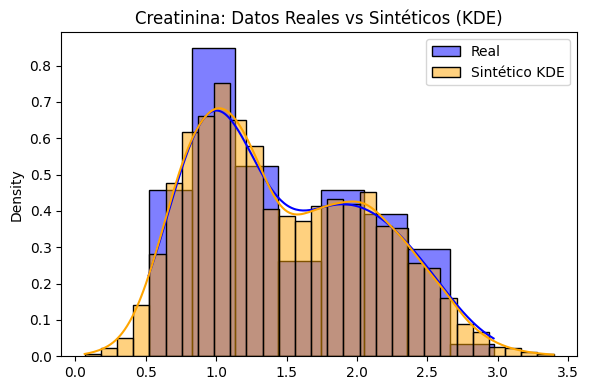

Log-Likelihood KDE: -76.9960
KS Test KDE – Statistic: 0.0700, p-value: 0.6971


In [7]:
# seleccionamos la variable continua (creatinina)
creatinina = data['creatinine_mg_dL'].dropna().values.reshape(-1,1)

# Ajustar KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(creatinina)

# Generar muestras sintéticas
synthetic_kde = kde.sample(5000)

# Visualización comparativa KDE
plt.figure(figsize=(6,4))
#original
sns.histplot(creatinina.flatten(), color='blue', kde=True, label='Real', stat='density')
#sintetico
sns.histplot(synthetic_kde.flatten(), color='orange', kde=True, label='Sintético KDE', stat='density')
plt.title('Creatinina: Datos Reales vs Sintéticos (KDE)')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluación KDE con Log-Likelihood
log_likelihood = kde.score(creatinina)
print(f"Log-Likelihood KDE: {log_likelihood:.4f}")

# KS Test
ks_kde = stats.ks_2samp(creatinina.flatten(), synthetic_kde.flatten())
print(f"KS Test KDE – Statistic: {ks_kde.statistic:.4f}, p-value: {ks_kde.pvalue:.4f}")


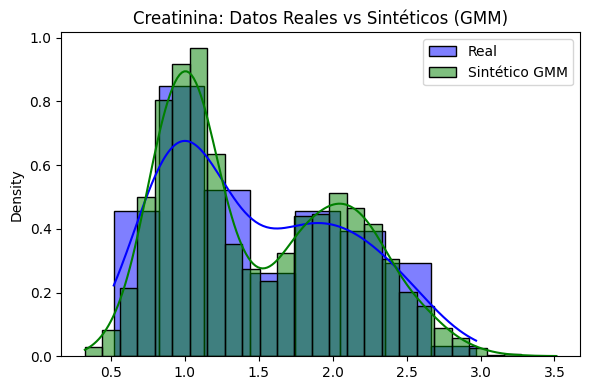

BIC GMM: 170.17
KS Test GMM – Statistic: 0.0406, p-value: 0.9951


In [8]:
# Ajuste GMM con 2 componentes (considerando los dos estados de salud de interes)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(creatinina)

# Generar muestras sintéticas
synthetic_gmm = gmm.sample(5000)[0]

# Visualización comparativa GMM
plt.figure(figsize=(6,4))
sns.histplot(creatinina.flatten(), color='blue', kde=True, stat='density', label='Real')
sns.histplot(synthetic_gmm.flatten(), color='green', kde=True, stat='density', label='Sintético GMM')
plt.title('Creatinina: Datos Reales vs Sintéticos (GMM)')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluación GMM con BIC
bic = gmm.bic(creatinina)
print(f"BIC GMM: {bic:.2f}")

# KS Test GMM
ks_gmm = stats.ks_2samp(creatinina.flatten(), synthetic_gmm.flatten())
print(f"KS Test GMM – Statistic: {ks_gmm.statistic:.4f}, p-value: {ks_gmm.pvalue:.4f}")
